#DATA CLEANING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

# !pip install scikit-plot
nltk.download("popular")

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Flipkart-Amazon-Mobile-Reviews/main/Reviews.csv')
df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review-Title  23775 non-null  object
 1   rating        23777 non-null  object
 2   Review-Body   23160 non-null  object
 3   Product Name  23777 non-null  object
dtypes: object(4)
memory usage: 743.2+ KB


In [ ]:
df['Review-Title'] = df['Review-Title'].fillna(method='ffill',limit=2)

In [ ]:
#Data Type and Cleaning have been taken care of here
df['rating'] = df['rating'].str.replace(' out of 5 stars','')
df['rating'] = df['rating'].astype('float')

In [ ]:
df = df.sort_values(by='rating',ascending=False)

In [ ]:
df['New Rating']=df['rating']
d={1:'Negative',2:'Negative',
   3:'Negative',
   4:'Positive',5:'Positive'}
df['New Rating'] = df['New Rating'].map(d)

In [ ]:
df['Product Name']=df['Product Name'].str.replace('(',',') 
df['Product Name']=df['Product Name'].str.replace(')','') 
df['Product Name']=df['Product Name'].str.replace('Redmi 10 Prime ,Bifrost Blue 4GB RAM 64GB ROM','Redmi 10 Prime ,Bifrost Blue, 4GB RAM, 64GB Storage') 
df['Product Name']=df['Product Name'].str.replace('+',',') 


df['Product Name'].value_counts() 
df_temp=df['Product Name'].str.split(',',expand=True) 
df=pd.concat([df,df_temp],axis=1)
df.drop('Product Name',axis=1,inplace=True)
df.rename(columns={0:'Product Name',1:'Product Color',2:'RAM',3:'ROM'},inplace=True)


#As there are observable usage of emoticons in the dataset so we are focussing on stripping them along with Puntuations.
df['Review-Title']=df['Review-Title'].str.extract('([a-zA-Z\s]+)',expand=False).str.lower()
df['Review-Body']=df['Review-Body'].str.extract('([a-zA-Z\s]+)',expand=False).str.lower()
df['Product Name']=df['Product Name'].str.lower()
df['Product Color']=df['Product Color'].str.lower()
df['RAM']=df['RAM'][0][1] 
df['ROM']=df['ROM'].str.extract('(\d\d\d|\d\d)')
df['ROM'].fillna(method='ffill',limit=2,inplace=True)
df['ROM'].fillna(method='bfill',limit=2,inplace=True)
df['ROM'].fillna('64',inplace=True)
df['RAM']=df['RAM'].astype('int')
df['ROM']=df['ROM'].astype('int')

df['Review-Body'].fillna('',inplace=True)

punct=[',','!','?',';']
for pun in punct:
  df['Review-Body'] = df['Review-Body'].str.replace(pun,'.')
for pun in punct:
  df['Review-Title'] = df['Review-Title'].str.replace(pun,'.')
df

,Review-Title,rating,Review-Body,New Rating,Product Name,Product Color,RAM,ROM
9796,good mobile verry nice,5.0,goood good verry nice jitna kha jaye usase ach...,Positive,realme narzo 50a,oxygen blue,8,64
7289,phone is good but after few months heating pro...,5.0,goodnight,Positive,oppo a31,mystery black,8,128
14768,good,5.0,fingerprint superb battery life poorcamera ave...,Positive,redmi 9 activ,carbon black,8,64
7267,nice product,5.0,nice product,Positive,oppo a31,mystery black,8,128
14767,liked it,5.0,whole world in your pocket,Positive,redmi 9 activ,carbon black,8,64
...,...,...,...,...,...,...,...,...
13333,worst phone dont byee overall performance is bad,1.0,worst phone dont byee overall performance is bad,Negative,redmi 10 prime,bifrost blue,8,64
13332,worst camera after,1.0,you can,Negative,redmi 10 prime,bifrost blue,8,64
13330,bad camera quality,1.0,very worst mobile,Negative,redmi 10 prime,bifrost blue,8,64
13329,please dont purchase no exchange offer,1.0,please dont purchase no exchange offer not goo...,Negative,redmi 10 prime,bifrost blue,8,64


In [ ]:
df.isnull().sum()

Review-Title      143
rating              0
Review-Body         0
New Rating          0
Product Name        0
Product Color    1340
RAM                 0
ROM                 0
dtype: int64

In [ ]:
dn=df[df.duplicated()]
dn
#There are no need to remove the duplications, only if more trustworthy features such as timestamp or review id were given.
del(dn)

In [ ]:
#Assuming rating=3 as Neutral in general
pos=0
neg=0
neut=0
for i in df.rating:
  if i>3:
    pos+=1
  elif i<=3:
    neg+=1
print('Positives:',pos,'-->',100*pos/(pos+neg),'%')
print('Negatives:',neg,' -->',100*neg/(pos+neg),'%')

Positives: 14285 --> 60.07906800689742 %
Negatives: 9492  --> 39.92093199310258 %


In [ ]:
df.groupby('Product Name').rating.value_counts().mean()

594.425

In [ ]:
rankdf = pd.DataFrame()
rankdf['Mean'] = df.groupby(['Product Name']).rating.mean()
rankdf.sort_values(by='Mean',ascending=False,inplace=True)

In [ ]:
ranks=np.arange(1,9)
rankdf['Overall Ranking'] = ranks
rankdf

,Mean,Overall Ranking
Product Name,,
oneplus nord ce 2 5g,3.760224,1
oppo a31,3.727021,2
realme narzo 50a,3.664820,3
redmi 9 activ,3.400897,4
vivo iqoo z6 5g,3.321353,5
redmi note 11,3.303598,6
redmi 10 prime,3.277070,7
samsung galaxy m32,3.184328,8


In [ ]:
# no=['not perfect','not value for money','don\'t buy','not best','not nice','dislike','don\'t like','phone is bad', 'bad', 'not good','worst phone', 'not great', 'dislike', 'slow',' bakwaas', 'not satified', 'bad experience', 'hate', 'worst', 'missing charger',  'Charger adaptor missing', 'poor', 'not value for money', 'lag','problem' ,' doesn\'t work','media not loading', 'media not loaded', 'low quality']
# yes=['perfect','love','value for money','super','superb','nice','best','awesome', 'like','phone is good','good,' 'must he', 'not bad', 'best phone', 'great phone', 'must buy',  'osm', 'mast hai', 'excellent', 'nice pic phone', 'good experience', 'valuable', 'amazing',' value for money',' wonderful',' pasand',' high quality' , 'love it','love this'] 
# df['label'] = -2

In [ ]:
# count=-1
# for i in df['Review-Title']:
#   count+=1
#   for j in yes:
#     if j in i:
#       df['label'][count] = 1
#   for j in no:
#     if j in i:
#       df['label'][count] = 0

In [ ]:
# df['label'].value_counts()

In [ ]:
# df['label'].value_counts()
# df.to_excel('RTR.xlsx')

In [ ]:
# df.sort_values(by='label',inplace=True,ascending=False)

In [ ]:
# df.to_excel('dfew2.xlsx')

In [ ]:
# df.drop(df[df.label==1].index,inplace=True)

As all mean have negligible difference, hence, this can not be used as a reliable measurement for ranking of product.

Here we checked for null values, data redunduncy, improper data types and cleaned data format using regex.   
Conclusion-  
Our Data is cleaned and ready for EDA.

#EDA


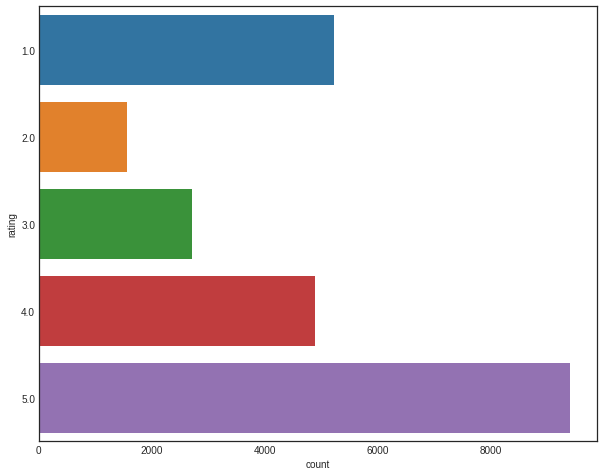

In [ ]:
sns.countplot(y=df['rating'])

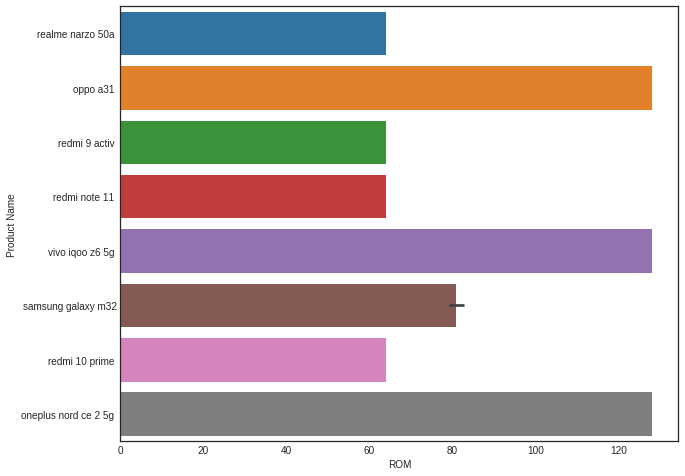

In [ ]:
sns.barplot(x=df.ROM, y=df['Product Name'])

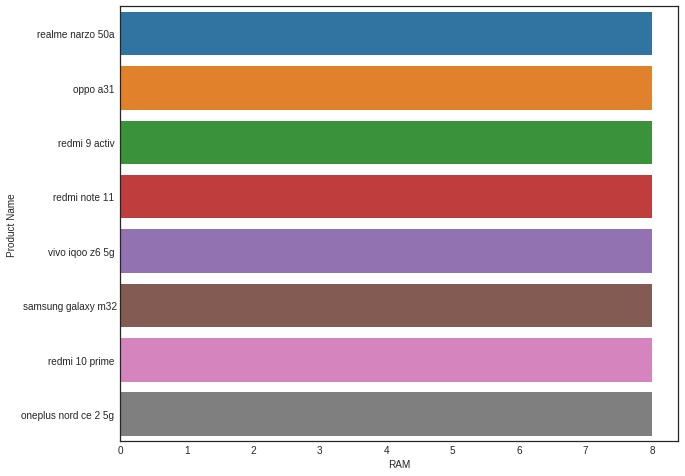

In [ ]:
sns.barplot(x=df.RAM, y=df['Product Name'])

In [ ]:
df2 = df.groupby(['Product Name','New Rating']).count()[['rating']]
df2

rating
Product Name          New Rating        
oneplus nord ce 2 5g  Negative      1164
                      Positive      2406
oppo a31              Negative      1418
                      Positive      2912
realme narzo 50a      Negative       742
                      Positive      1424
redmi 10 prime        Negative      1731
                      Positive      2037
redmi 9 activ         Negative      1896
                      Positive      2564
redmi note 11         Negative      1244
                      Positive      1480
samsung galaxy m32    Negative       654
                      Positive       686
vivo iqoo z6 5g       Negative       643
                      Positive       776

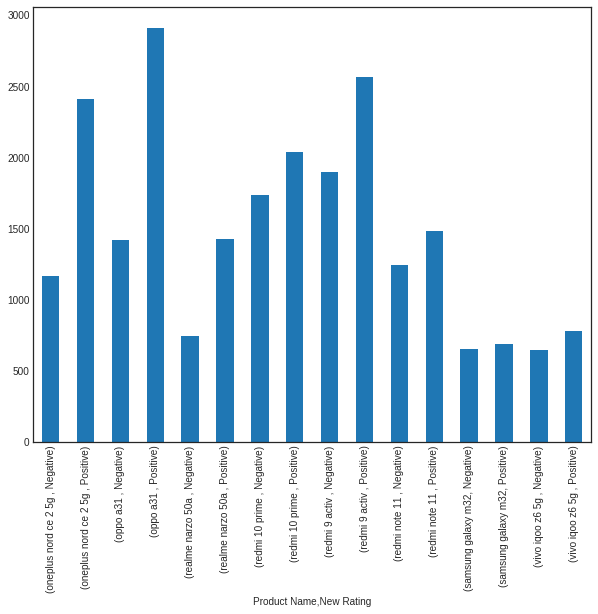

In [ ]:
df.groupby(['Product Name','New Rating']).rating.count().plot(kind='bar')

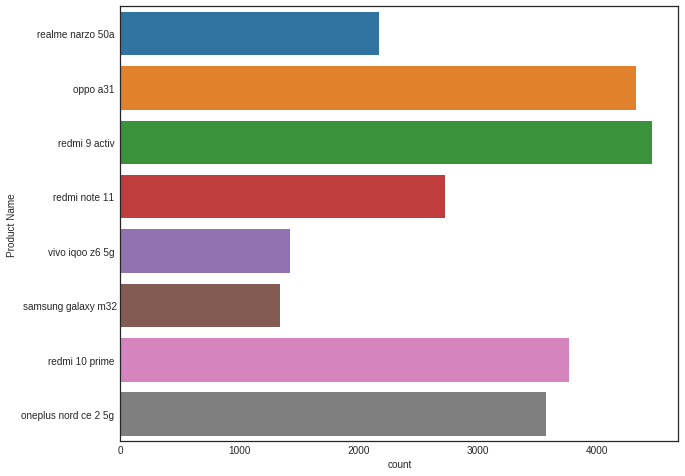

In [ ]:
sns.countplot(y=df['Product Name'])

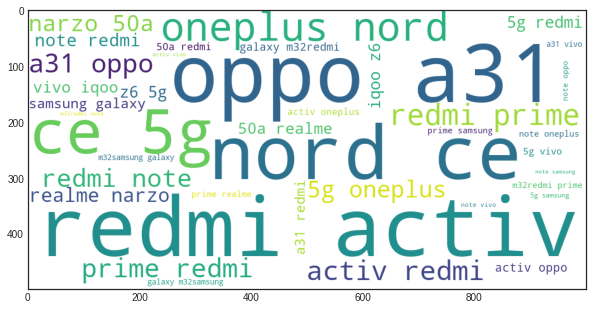

In [ ]:
from wordcloud import WordCloud
import re

from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 10,8
word_cloud = ""
for row in df['Product Name'].values:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

#Feature Engineering

##Tokenization

STOPWORD REMOVAL

##Lemmitization

In [ ]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import re
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        # new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('hinglish'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
import textblob
# df['corpus'] = df['Review-Body'].apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))
df['Review-Title'] = text_transformation(df['Review-Title'])

In [ ]:
df.to_excel('dff.xlsx')

In [ ]:
# To remove the empty elements in corpus
# corpus = [i for i in corpus if i]


In [ ]:
df = df.drop(df.index[100:])

CONCLUSION-  
Our Courpus is ready for processing.

#Semantic Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

# !pip install scikit-plot
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
df = pd.read_csv('mydata.csv')
df.head()

,Review-Body,label
0,it is very worst product,0
1,purchased this phone on,0
2,there is network issue,0
3,super smart phone easy and smooth operationno ...,0
4,very bad interface,0


In [ ]:
cdf=df[['Review-Body','label']].copy()

In [ ]:
cdf.shape

(14182, 2)

In [ ]:
cdf.dropna(how='any',inplace=True)

In [ ]:
cdf.shape

(13718, 2)

In [ ]:
cdf.label.value_counts()

1    8620
0    5098
Name: label, dtype: int64

In [ ]:
cdf.isnull().sum()

Review-Body    0
label          0
dtype: int64

In [ ]:
cdf.shape

(13718, 2)

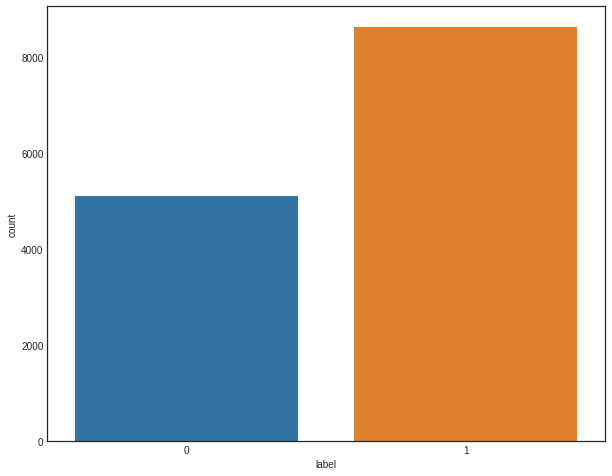

In [ ]:
sns.countplot(cdf['label'])
# cdf.shape
# cdf.isnull().sum()

In [ ]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import re
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        # new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('hinglish'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
import textblob
# df['corpus'] = df['Review-Body'].apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))
cdf['Review-Body'] = text_transformation(cdf['Review-Body'])

In [ ]:
cdf.shape

(13718, 2)

In [ ]:
cdf.sort_values(by='label',inplace=True)

In [ ]:
# cdf.to_csv('cdf.csv')

#FROM HERE................

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
cdf = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Flipkart-Amazon-Mobile-Reviews/main/CDFtrain.csv')

In [ ]:
cdf.isnull().sum()

Review-Body    0
label          0
dtype: int64

In [ ]:
X = cdf['Review-Body'].values
y = cdf['label'].values

In [ ]:
X.shape,y.shape

((14000,), (14000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

In [ ]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((2800,), (2800,), (11200,), (11200,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
X_train = cv.fit_transform(X_train)

In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'max_depth': [4, None],
             'min_samples_split': [20],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 50}

In [ ]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
Mean Test Score:  0.6243749999999999
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Mean Test Score:  0.6243749999999999
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
Mean Test Score:  0.6243749999999999
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Mean Test Score:  0.6243749999999999
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
Mean Test Score:  0.6125892857142856
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_fea

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_split=20, n_estimators=50)

In [ ]:
#pre-processing of text
# test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(X_test)        #n-gram applies!
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(rfc,f)

In [ ]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [ ]:
predictions = mp.predict(testdata)

Accuracy_score:  0.6225
Precision_score:  0.6225
Recall_score:  1.0
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1057
           1       0.62      1.00      0.77      1743

    accuracy                           0.62      2800
   macro avg       0.31      0.50      0.38      2800
weighted avg       0.39      0.62      0.48      2800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


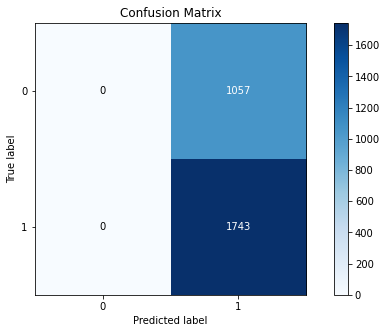

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from matplotlib import style,rcParams

rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
predictions_probability = rfc.predict_proba(testdata)

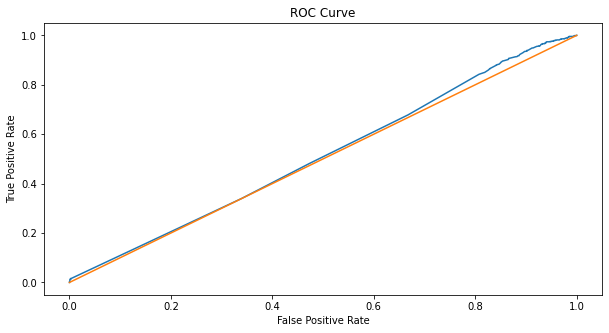

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()